In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('../Datasets//homicidios_limpio.csv')
df.head()

,Id,N_victimas,Fecha,Año,Mes,Dia de semana,Hora,Lugar_del_hecho,Tipo_de_calle,Calle,...,Xy (caba),Longitud,Latitud,Participantes,Victima_x,Acusado,Rol,Victima_y,Sexo,Edad
0,2016-0001,1,2016-01-01,2016,1,Viernes,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,...,98896.78238426 93532.43437792,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19.0
1,2016-0002,1,2016-01-02,2016,1,Sabado,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,"PAZ, GRAL. AV.",...,95832.05571093 95505.41641999,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70.0
2,2016-0003,1,2016-01-03,2016,1,Domingo,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,...,106684.29090040 99706.57687843,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30.0
3,2016-0004,1,2016-01-10,2016,1,Domingo,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,...,99840.65224780 94269.16534422,-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MOTO,MASCULINO,18.0
4,2016-0005,1,2016-01-21,2016,1,Martes,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,...,106980.32827929 100752.16915795,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MOTO,MASCULINO,29.0


In [4]:
df.loc[df['Hora']=='SD','Hora'] = np.nan
df['Hora'] = df['Hora'].astype('float')


In [5]:
#Hay 2 columnas llamada victima que contienen la misma data, eliminamos 1
df.drop(['Victima_y'],axis=1, inplace=True)
#Modifico el nombre de la columna
df.rename(columns={'Victima_x':'Victima','Xy (caba)':'Coordenadas'}, inplace=True)


**Columnas**
- **ID**: identificador unico del siniestro.
- **N_VICTIMAS**: cantidad de víctimas del siniestro.
- **FECHA**: Fecha en la que ocurrio el siniestro.
- **AÑO, MES, DIA y HORA**: (son 4 columnas)
- **LUGAR_DEL_HECHO**: Dirección del hecho.
- **TIPO_DE_CALLE**: Tipo de arteria. En el caso de intersecciones a nivel se clasifica según la de mayor jerarquía.
- **CALLE**: Nombre de la arteria donde se produjo el hecho.
- **CRUCE**: Cruce en caso de que sea una encrucijada.
- **COMUNA**: Comuna de la ciudad (1 a 15)
- **LONGITUD Y LATITUD**: Coordenadas donde sucedio el siniestro. (son 2 columnas)
- **PARTICIPANTES**: Conjunción de víctima y acusado.
- **VICTIMA**: Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a.  
- **ACUSADO**: Vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal.
- **ROL**: Puesto que ocupaba en el siniestro (conductor, pasajero, peaton, ciclista)
- **SEXO**
- **EDAD**

#### **ALGUNAS PREGUNTAS A RESPONDER**

- ¿Se producen mas accidentes en cruces?
- ¿En que tipo de calle hubo mas siniestros?
- ¿Cual es la cantidad de siniestros por comuna?
- ¿Cual es la comuna con mas victimas?
- ¿En que año hubo mayor cantidad de siniestros?
- ¿Cual es el dia de la semana en que se producen mas y menos siniestros?
- ¿Cual es el vehiculo 'Acusado' con mas frecuencia?
- ¿Hay mas hombres que mujeres?

In [6]:
print(f"El dataset tiene {df.shape[0]} Filas y {df.shape[1]} Columnas")
print("Tipos de datos\n", df.dtypes)

El dataset tiene 717 Filas y 21 Columnas
Tipos de datos
 Id                  object
N_victimas           int64
Fecha               object
Año                  int64
Mes                  int64
Dia de semana       object
Hora               float64
Lugar_del_hecho     object
Tipo_de_calle       object
Calle               object
Cruce                 bool
Comuna             float64
Coordenadas         object
Longitud           float64
Latitud            float64
Participantes       object
Victima             object
Acusado             object
Rol                 object
Sexo                object
Edad               float64
dtype: object


In [7]:
# Selecciona todas las columnas numéricas
col_numericas = df.select_dtypes(exclude=['object','bool']).columns
col_numericas = len(col_numericas)
col_categoricas = df.select_dtypes(include=['object','bool']).columns
col_categoricas = len(col_categoricas)

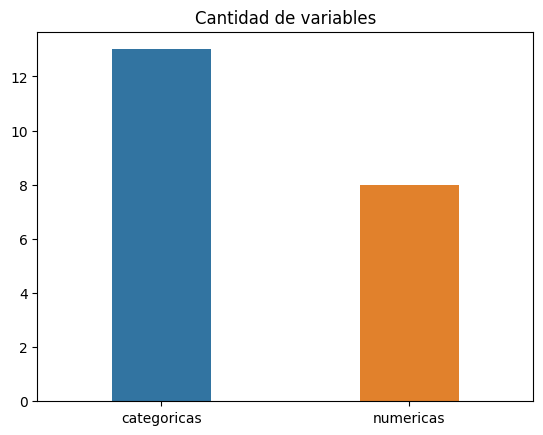

In [8]:
sns.barplot(x=['categoricas','numericas'],y=[col_categoricas,col_numericas],
            width=0.4, hue=['categoricas','numericas'])
plt.title('Cantidad de variables')
plt.show()

In [9]:
print('Cantidad de valores nulos:')
print(df.isnull().sum())
print('Total:',df.isnull().sum().sum())
print('Filas duplicadas:',df.duplicated().sum())

Cantidad de valores nulos:
Id                 0
N_victimas         0
Fecha              0
Año                0
Mes                0
Dia de semana      0
Hora               1
Lugar_del_hecho    0
Tipo_de_calle      0
Calle              1
Cruce              0
Comuna             2
Coordenadas        0
Longitud           4
Latitud            4
Participantes      0
Victima            0
Acusado            0
Rol                0
Sexo               0
Edad               6
dtype: int64
Total: 18
Filas duplicadas: 0


In [10]:
df.describe()

,N_victimas,Año,Mes,Hora,Comuna,Longitud,Latitud,Edad
count,717.000000,717.000000,717.000000,716.000000,715.000000,713.000000,713.000000,711.000000
mean,1.061367,2018.174338,6.688982,11.554469,7.451748,-58.441535,-34.619499,42.194093
std,0.257024,1.672655,3.575140,6.700055,4.373508,0.046497,0.035431,19.159641
min,1.000000,2016.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250,1.000000
25%,1.000000,2017.000000,4.000000,6.000000,4.000000,-58.477214,-34.644103,28.000000
50%,1.000000,2018.000000,7.000000,11.000000,8.000000,-58.444513,-34.622882,39.000000
75%,1.000000,2019.000000,10.000000,17.000000,11.000000,-58.401841,-34.596351,55.000000
max,3.000000,2021.000000,12.000000,23.000000,15.000000,-58.353695,-34.534654,95.000000


**INSIGHTS DEL ANÁLISIS BREVE DE ESTADÍSTICOS**
- El 75% de los siniestros tuvieron 1 sola victima.
- La cantidad maxima de victimas por siniestro fue 3.
- El 50% de los siniestros ocurrieron en la comuna N° 8 e inferiores
- La edad minima es 1 y la edad maxima 95
- El promedio de edad para los siniestros es 42

In [11]:
#Promedio de edad por sexo
datos_sin_SD =df[df['Sexo'].isin(['FEMENINO','MASCULINO'])]
promedio = datos_sin_SD.groupby('Sexo')['Edad'].mean()
print(promedio)

Sexo
FEMENINO     50.777108
MASCULINO    39.579817
Name: Edad, dtype: float64


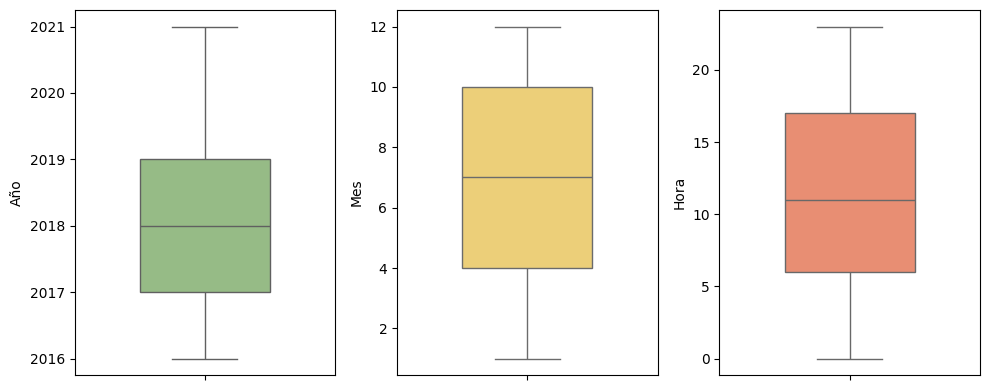

In [12]:
plt.figure(figsize=(10, 4))

plt.subplot(1,3,1)
sns.boxplot(y='Año', data= df, color='#93C47D', width=0.5)
plt.ylabel('Año')

plt.subplot(1,3,2)
sns.boxplot(y='Mes', data= df,color='#FFD966', width=0.5)
plt.ylabel('Mes')

plt.subplot(1,3,3)
sns.boxplot(y='Hora',data=df,color='#FB8360', width=0.5)

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()


Al observar los graficos de caja podemos deducir lo siguiente.

En el grafico **año** la *mediana* se encuentra justo en el medio de la caja. Esto significa que la distribucion es simetrica (el 50% de los datos tienen un valor de año igual o menor a 2018, y el otro 50% tiene un valor igual o mayor a 2018).
- Los años van desde el 2016 a 2021. El 50% de los datos se encuentra entre los años 2017 y 2019.

En el grafico **mes**
- El 50% de los meses  estan entre el mes 4 y el mes 10.
- La *mediana* se encuentra en el mes 7.

Se deberia investigar si hay meses específicos que presentan  mayor variabilidad en comparación con otros.

En el grafico **hora**
- El 50% de las horas esta entre las 4 y 18
- La *mediana* se encuentra en 12. Esto indica que el 50% de los siniestros ocurren antes de las 12 y el otro 50% después de las 12.

Ninguna de estas graficas presenta valores atipicos.

In [13]:
# La hora 0 son las 12pm por lo tanto se cambiara por el valor 24 ya que con el valor 0 confunde el grafico
df['Hora'] = df['Hora'].replace(0,24)
df['Hora'].unique()

array([ 4.,  1.,  7., 24.,  5., 18., 19., 15., 11., 22., 16.,  9., 23.,
        6., 10., 17., 12.,  8., 20., 21., 14.,  3.,  2., 13., nan])

**Distribucion de edad**

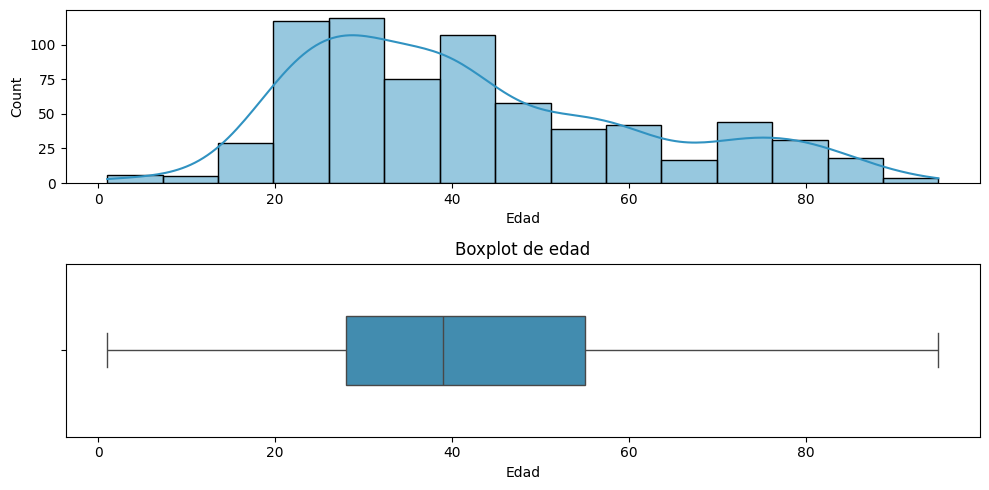

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(2,1,1)
sns.histplot(data=df, x='Edad',bins=15, kde= True, color='#3092C1')

plt.subplot(2,1,2)
sns.boxplot(data=df, x='Edad', color='#3092C1',width=0.4)
plt.title('Boxplot de edad')

plt.tight_layout()# Ajustar espaciado entre subplots
plt.show()

En el histograma se observa que la distribución de edades está sesgada positivamente, lo que indica que la mayoría de las edades en el conjunto de datos son más bajas. Estas se concentran entre los 20 y 45 años.

El rango de edades va de 1 a 95. Segun el diagrama de caja el 50% de las edades son menores que 40. No se observan valores atipicos.

In [15]:
df['Edad'].describe()

count    711.000000
mean      42.194093
std       19.159641
min        1.000000
25%       28.000000
50%       39.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

In [16]:
#Funcion para agregar etiqueta de magnitud a graficos de barras
def ubication_label(grafico):
  for p in grafico.patches:    
    height = p.get_height() # Obtiene la altura (frecuencia) de la barra
    pos_inicial_bar = p.get_x()
    ancho_barra = p.get_width() / 2
    
    x_pos = pos_inicial_bar + ancho_barra #Posicion donde se coloca la etiqueta
    y_pos = height # Ajuste de la posición vertical
    
        # Agrega la etiqueta 
    grafico.annotate(f'{height}', (x_pos, y_pos), ha='center', va='bottom')

**Distribucion de victimas segun sexo**

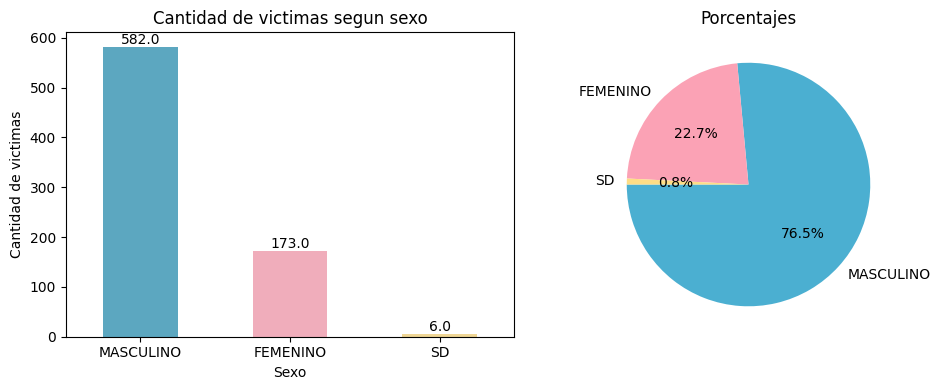

In [17]:
#¿Hay mas Acusados Hombres que mujeres?
sexo = df.groupby('Sexo')['N_victimas'].sum()
sexo = sexo.sort_values(ascending=False) #Ordena de mayor a menor

plt.figure(figsize=(10,4))
colores = ['#4BAFD1', '#FBA2B5', '#FEDD86']

plt.subplot(1,2,1)
grafico = sns.barplot(x=sexo.index, y=sexo.values, palette=colores, hue=sexo.index,width=0.5)
ubication_label(grafico)
plt.title('Cantidad de victimas segun sexo')
plt.ylabel('Cantidad de victimas')

plt.subplot(1,2,2)
sexo.plot.pie( startangle=180, autopct='%1.1f%%', colors=colores)
plt.gca().axes.yaxis.set_visible(False)  # Oculta etiqueta de el eje y
plt.title('Porcentajes')
plt.tight_layout()
plt.show()

**Insights obtenidos de la distribucion de sexo**

- 582 victimas son hombres, lo que representa el 76,5% del dataset
- 173 victimas son mujeres, lo que representa el 22.7% del dataset
- 6 victimas no tienen sexo asignado.

**Frecuencia segun cruce**

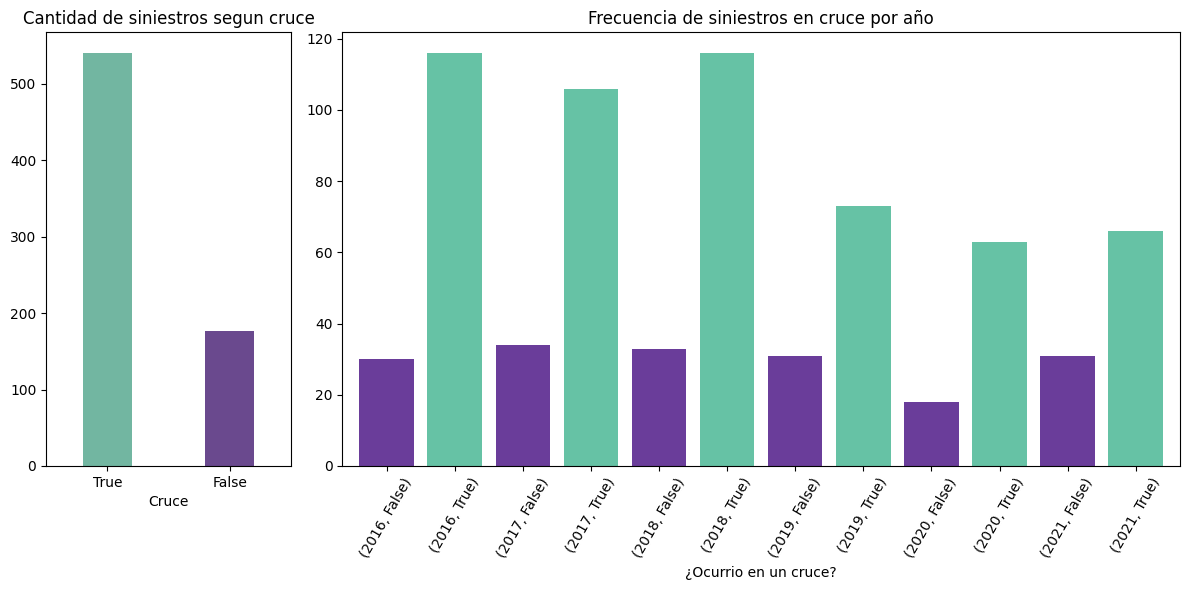

In [18]:
# ¿Se producen mas accidentes en cruces?
cruce = df['Cruce'].value_counts()
plt.figure(figsize=(12,6))
plt.subplot2grid((1, 4), (0, 0), colspan=1)# Primer subplot (más angosto)
sns.barplot(x=['True','False'], y=cruce.values, palette=['#66C2A5', '#6A3D9A'],width=0.4, hue=['True','False'])
plt.xlabel('Cruce')
plt.title('Cantidad de siniestros segun cruce')

cruce_por_año = df.groupby(['Año', 'Cruce']).size()

plt.subplot2grid((1, 4), (0, 1), colspan=3) # Segundo subplot (más ancho)
cruce_por_año.plot(kind='bar', stacked=True, color=['#6A3D9A','#66C2A5'], width=0.8)
plt.xlabel('¿Ocurrio en un cruce?')
plt.xticks(rotation=60)
plt.title('Frecuencia de siniestros en cruce por año')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()


En ambos gráficos se presentan los valores **True** y **False**. Cuando un siniestro ocurrió en un cruce, se representa como **True**; mientras que **False** indica que no ocurrió en un cruce.

El primer grafico muestra el  total de siniestros que ocurrieron o no en un cruce. Se puede observar que la mayoria de los siniestros ocurrieron en cruces.

El segundo grafico muestra el mismo recuento agrupado por año. En este se puede observar un **patrón** consistente a lo largo de los años, donde la cantidad de siniestros en cruces supera notablemente a los que No ocurrieron en cruces.

In [19]:
print(df['Cruce'].value_counts())

Cruce
True     540
False    177
Name: count, dtype: int64


**Distribucion por tipo de calle**

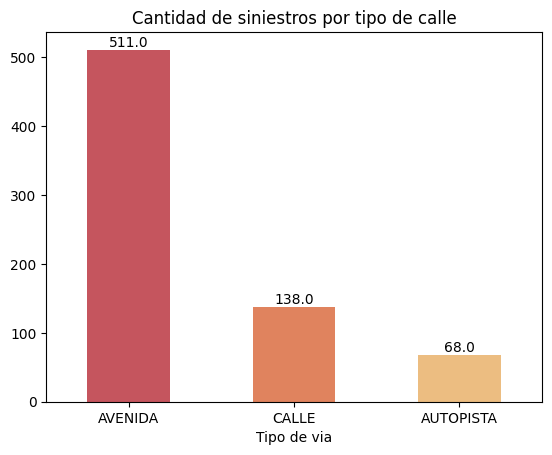

In [20]:
# ¿En que tipo de calle hubo mas siniestros?
tipo = df['Tipo_de_calle'].value_counts()

sns.set_palette("Spectral",8)
grafico = sns.barplot(x=tipo.index, y=tipo.values,hue=tipo.index,width=0.5)
plt.xlabel('Tipo de via')
plt.title('Cantidad de siniestros por tipo de calle')

ubication_label(grafico)

plt.show()

#puedo hacer un grafico de barras y lineas con el año

Se observa una amplia diferencia en la frecuencia de siniestros segun el tipo de via. Las **avenidas** registran la mayor cantidad de siniestros, con un total de 518 eventos. En segundo lugar, se encuentran las **calles**, con 138 siniestros, seguidas por las **autopistas**, con un total de 68 incidentes

**Frecuencia de siniestros por comuna**

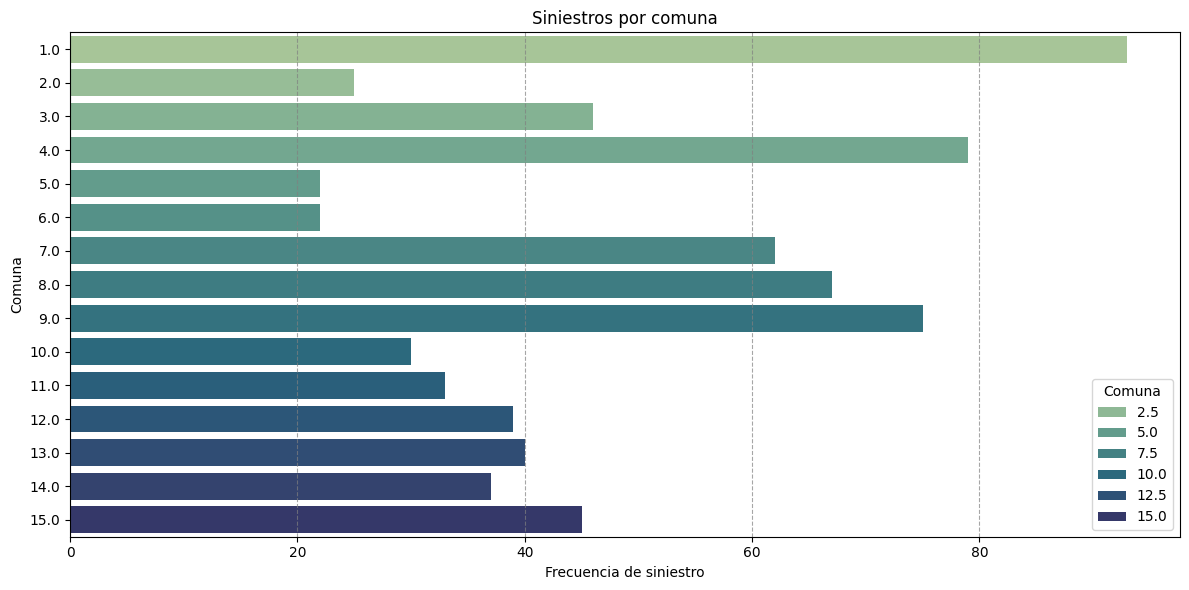

In [21]:
#¿Cual es la cantidad de siniestros por comuna?
comuna = df.groupby('Comuna')['Id'].count()
plt.figure(figsize=(12,6))

sns.barplot(x=comuna.values, y=comuna.index, orient='h', palette='crest',hue=comuna.index)
# Grid del Eje X
plt.grid(
    visible=True,
    axis='x',
    color='grey',
    linestyle='--',
    alpha=0.7
)
plt.title('Siniestros por comuna')
plt.xlabel('Frecuencia de siniestro')
plt.tight_layout()
plt.show()

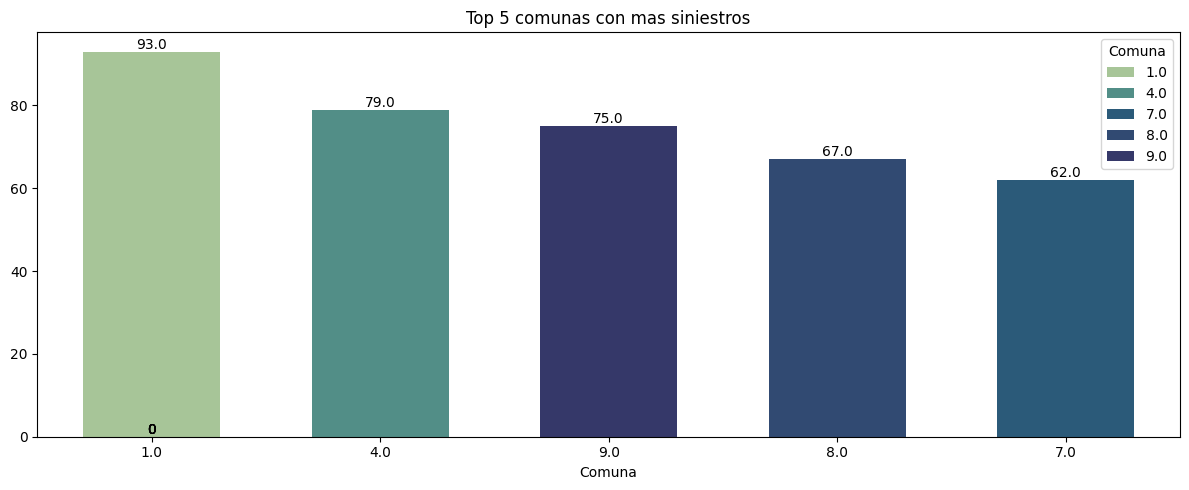

In [22]:
#¿Cual es la comuna con mas victimas?
top_comunas = df['Comuna'].value_counts().head(5)
top_comunas = top_comunas.sort_values(ascending=False)

plt.figure(figsize=(12,5))

grafico = sns.barplot( y=top_comunas.values, x=top_comunas.index,palette='crest', 
            hue=top_comunas.index, order=top_comunas.index, width=0.6)

plt.title('Top 5 comunas con mas siniestros')
ubication_label(grafico)
plt.tight_layout()
plt.show()


In [23]:
mensual = df.groupby(['Año','Mes'])['Id'].count().reset_index()#reset_index lo transforma en df
#Ponea cada Año en una columna diferente y cada Mes como indice
pivote = mensual.pivot(index='Mes', columns='Año', values='Id')
pivote.head(3)

Año,2016,2017,2018,2019,2020,2021
Mes,,,,,,
1,8,10,14,9,8,13
2,12,11,11,8,8,9
3,13,12,8,11,5,7


**Siniestro distribuidos por mes segun año**

 

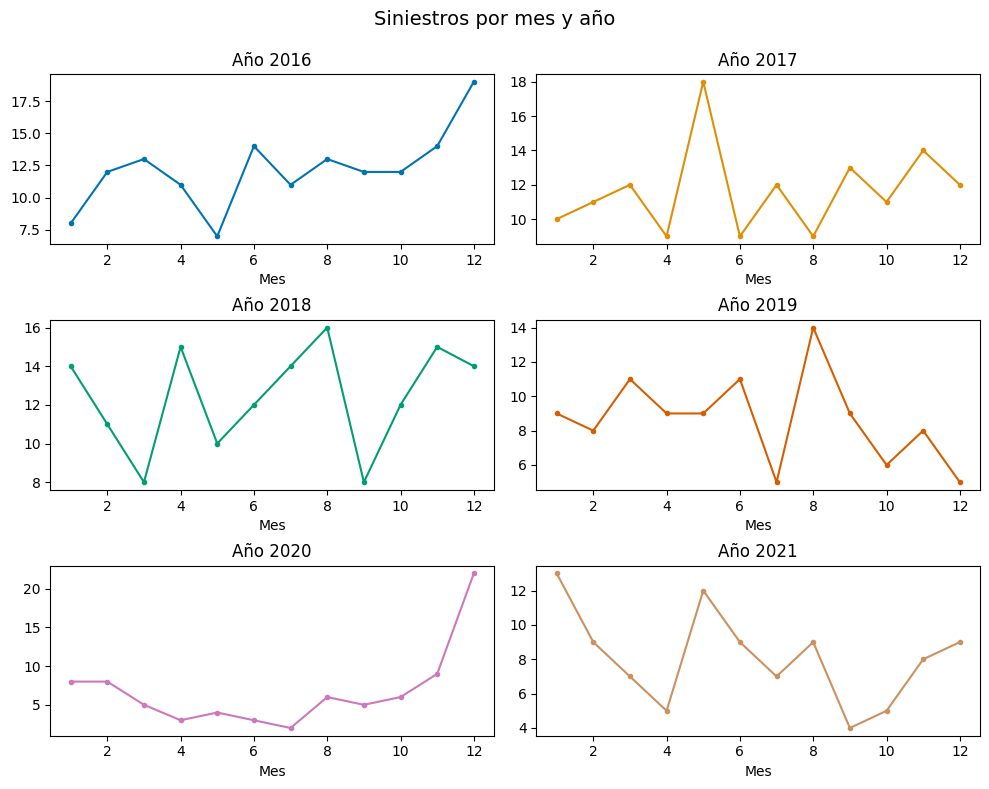

In [24]:
fig = plt.figure(figsize=(10, 8))
palette = sns.color_palette("colorblind")

# Itera sobre cada columna de pivote.
for i, name_col in enumerate(pivote.columns, 1):  
    #Crea un subplot (3=filas, 2=columnas, i=lugar donde ira el subplot)
    plt.subplot(3, 2, i) 
     #Cuando i = 1, crea el 1er subplot en la esquina superior izquierda.
     #Cuando i = 2, crea el 2do subplot en la segunda posición de la primera fila. Etc
     
    pivote[name_col].plot.line(style='.-', color=palette[i-1])#Crea el grafico segun el nombre de columna
    
    plt.title(f'Año {name_col}')
    plt.xlabel('Mes')  

# Ajusta el espacio entre los subplots
plt.tight_layout()
plt.suptitle('Siniestros por mes y año', fontsize=14)
plt.subplots_adjust(top=0.9)# Ajusta el espacio entre grafico y el título 
plt.show()

Los picos de siniestros no se observan en los mismos meses en los distintos años registrados. Por lo tanto no encontramos patron entre estos datos.
Se puede observar una notable disminuicion de siniestros entre diciembre de 2019 la cual se mantiene hasta noviembre de 2020. Esto se debe a la cuarentena por covid.

**Distribucion semanal**

C:\Users\pablo\AppData\Local\Temp\ipykernel_3572\3648393550.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=dia, y='Id', x='Dia de semana',


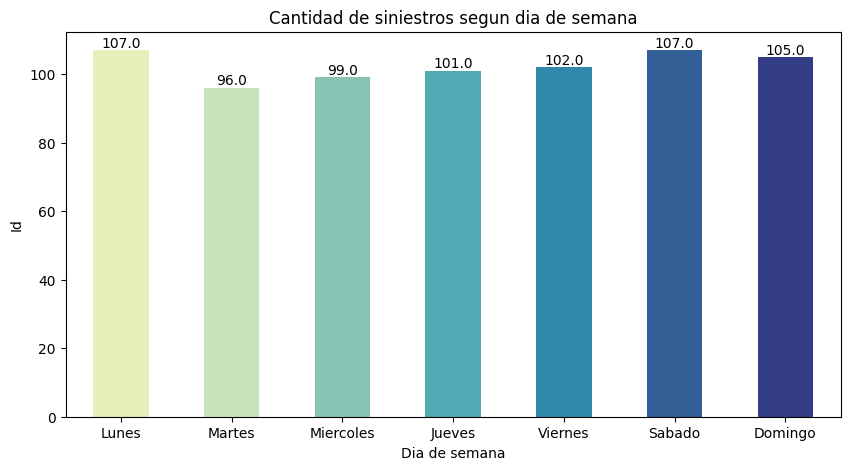

In [25]:
#¿Cual es el dia de la semana en que se producen mas y menos siniestros?
dia = df.groupby('Dia de semana')['Id'].count().reset_index()
dias_ordenados = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

plt.figure(figsize=(10,5))
grafico = sns.barplot(data=dia, y='Id', x='Dia de semana', 
                      order=dias_ordenados, width=0.5, palette='YlGnBu')#,hue='Dia de semana')

ubication_label(grafico)
plt.title('Cantidad de siniestros segun dia de semana')
plt.show()

Al observar el grafico de barras vemos que: Los dias **Lunes** y **Sabados** se producen mayor cantidad de siniestros, mientras que el **Martes** contiene la cantidad minima. 

In [26]:
#Cantidad de accidentes por año y sexo (grafico multilineas para saca sexo)

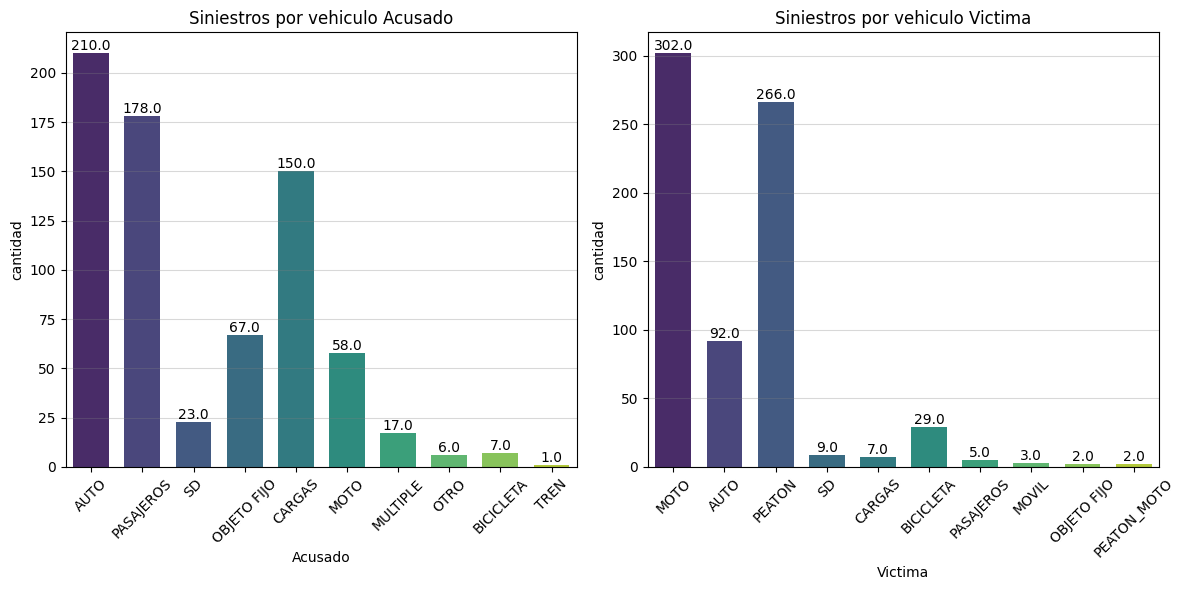

In [27]:
#¿Cual es el vehiculo 'Acusado' con mas frecuencia?
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

acusado = sns.countplot(data=df, x='Acusado',palette='viridis',hue='Acusado',width=0.7)
ubication_label(acusado)
#Se añade una cuadricula (lineas sobre el eje y)
plt.grid(
    visible=True, #visualiza la cuadricula
    axis='y',
    color='grey',
    linestyle='-',
    alpha=0.3 #Transparecia de las lineas
)
plt.xticks(rotation=45)
plt.title('Siniestros por vehiculo Acusado')
plt.ylabel('cantidad')

plt.subplot(1,2,2)

victimas = sns.countplot(data=df, x='Victima',palette='viridis',hue='Victima',width=0.7)
ubication_label(victimas)
#Se añade una cuadricula (lineas sobre el eje y)
plt.grid(
    visible=True, #visualiza la cuadricula
    axis='y', 
    color='grey',
    linestyle='-',
    alpha=0.3 #Transparecia de las lineas
)
plt.xticks(rotation=45)
plt.title('Siniestros por vehiculo Victima')
plt.ylabel('cantidad')

plt.tight_layout()
plt.show()

**Pair plot**


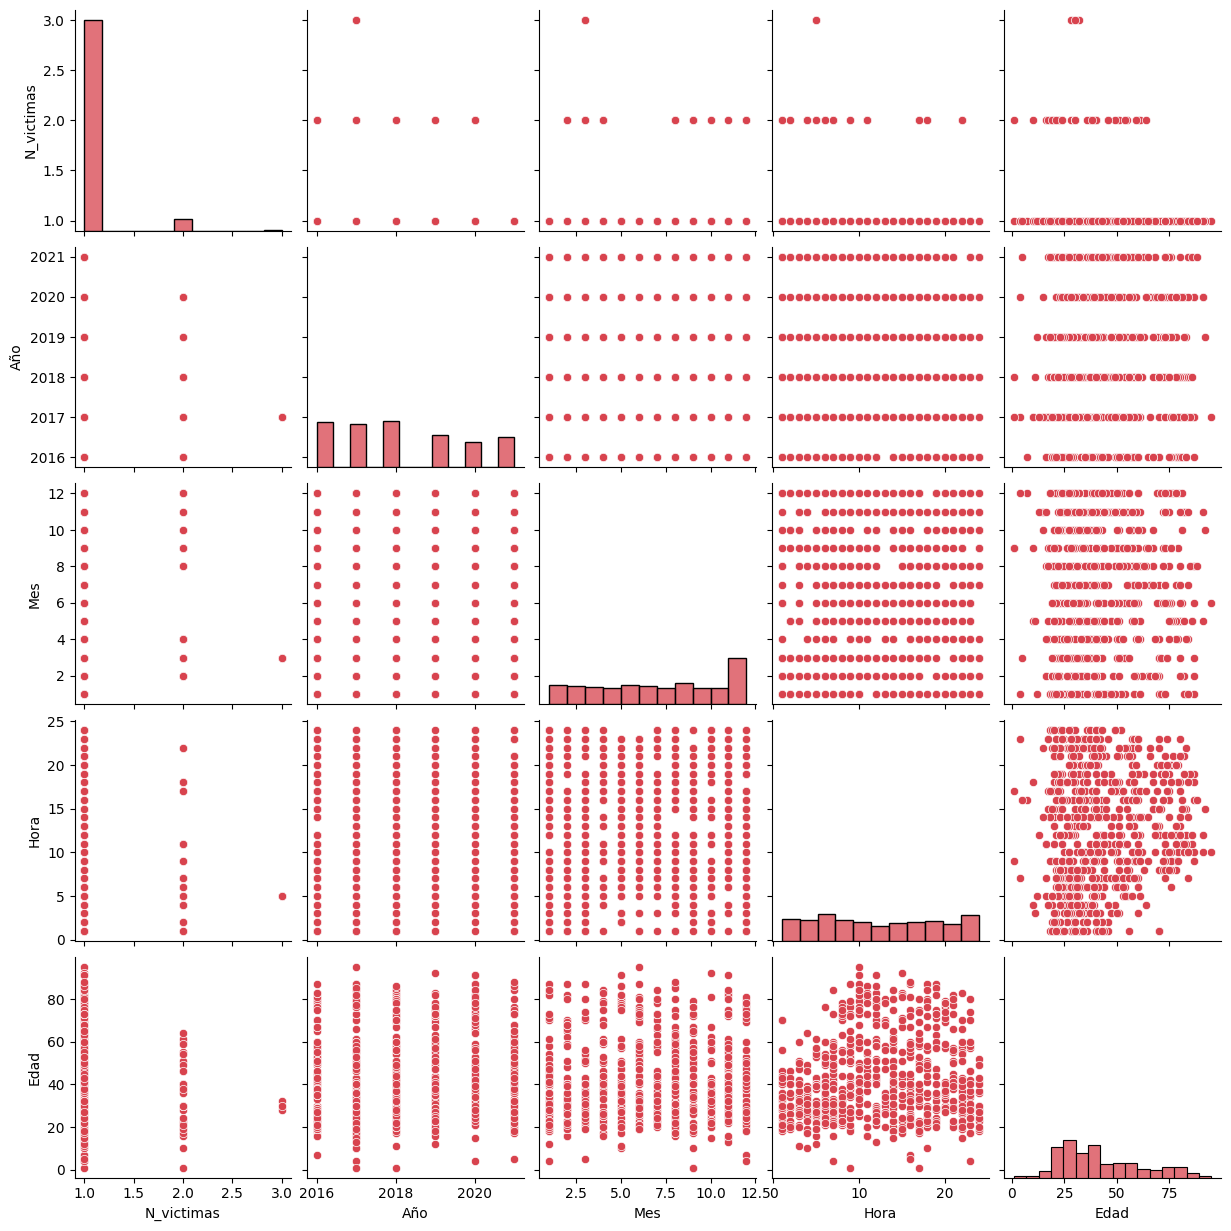

In [28]:
df_plot = df[['N_victimas','Año','Mes','Hora','Edad']]
sns.pairplot(data=df_plot)
plt.show()

Al observar los diferentes graficos de dispersion no se identifican patrones ni relaciones lineales entre las variables numéricas del dataset.

**Matriz de correlacion**

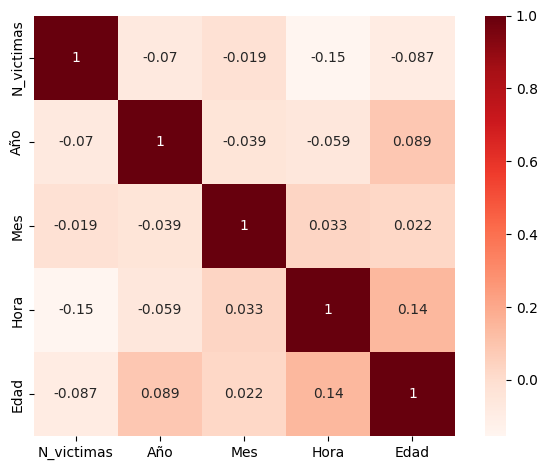

In [29]:
df_cor = df[['N_victimas','Año','Mes','Hora','Edad']].corr()
sns.heatmap(df_cor, annot=True,cmap='Reds', square=True)
plt.tight_layout()
plt.show()

Al observar la matriz de correlación, vemos que las correlaciones más altas son 0.14 (positiva) y -0.15 (negativa). Estas correlaciones indican relaciones lineales muy débiles entre las variables correspondientes. Por lo tanto, no es posible afirmar que una variable pueda influir directamente en otra.